In [1]:
import pandas as pd
import json
import os

# --- CONFIGURATION ---
DATA_DIR = "../Automate" # Adjust if your path is different
# ---------------------

def load_parquet(filename):
    path = os.path.join(DATA_DIR, filename)
    if os.path.exists(path):
        print(f"✅ Loading {filename}...")
        return pd.read_parquet(path)
    else:
        print(f"❌ Missing {filename}")
        return None

# 1. Load Assemblies (The Hierarchy)
df_assemblies = load_parquet("assemblies.parquet")

# 2. Load Mates (The Relationships/Labels)
df_mates = load_parquet("mates.parquet")

# 3. Load Encodings (The Dictionary)
json_path = os.path.join(DATA_DIR, "config_encodings.json")
if os.path.exists(json_path):
    with open(json_path, "r") as f:
        encodings = json.load(f)
    print(f"✅ Loaded encodings (Keys: {list(encodings.keys())})")
else:
    print("❌ Missing config_encodings.json")
    encodings = {}

# --- INSPECTION ---
print("\n" + "="*40)
print("ASSEMBLIES DATA (Who contains what?)")
print("="*40)
if df_assemblies is not None:
    display(df_assemblies.head())
    print(f"Total Assemblies: {df_assemblies.shape[0]}")

print("\n" + "="*40)
print("MATES DATA (How do they connect?)")
print("="*40)
if df_mates is not None:
    display(df_mates.head())
    print(f"Total Mates: {df_mates.shape[0]}")

✅ Loading assemblies.parquet...
✅ Loading mates.parquet...
✅ Loaded encodings (Keys: ['n3rjtrvb', '6l7owe5e', 'zuujgt7r', 'c46xprn4', 'bfqfbpoh', 'nsrjf5dt', '2x3ruza6', '6arbc4os', '64tehtqu', '6zt4gqvm', 'duq3acn6', 'p6n5z5uy', '5eexsvlv', 'qrygb5fr', 'a43qkmio', 'tdmxvyxt', 'r2cvupjj', 'bglff6so', '2n5cc2eb', 'x63jolwh', 'o3ej4qit', '6lhrjzjb', 'r7ywoiip', 'q74almdj', 'q3gnsn5y', 'wupilspe', 'wwuhu3os', 'w4ywlasy', '5gc3pcrz', 'sbm4u3ay', '4gwobe5x', '25wcrkz2', 'j4qvquzl', 'wn4xxq7u', 'loa4tybk', 'z5sxxmc7', '472envnm', '2er6s5i7', 'floa4fis', 'ba2bnqey', 'takhar6l', 'cpltupjf', 'qlcm2k2w', 'ionjkxft', '5pib4w54', '4tymspkz', '3fcjy4d4', 'ncgrkwo7', 'mzg423rl', 'lvfkbleg', 'wffgqbte', 'v6hjcw56', 'nf5vfxnz', 'n42zu2d2', '4mxah2pz', 'th2p4s7w', 'ifjns7pa', 'amccnqze', 'u22df5wg', 'mh2jrnsy', 'bv7bzsef', '55gibqhn', 'xbxd6c4n', 'kvillcvk', '3lgfy46j', 'wswsmis6', 'kk45hmcz', 'ct44dy6c', 'sphiqrjc', 'kbk5jxxt', '3n2eakdl', 'f6sdojfs', 'dlxt2i6m', 'czr36o22', 'u6xvwmaq', 'g3saboty', '2

,assemblyId,n_subassemblies,n_parts,n_parasolid,n_parasolid_errors,n_step,n_occurrences,n_mates,n_ps_mates,n_step_mates,n_groups,n_relations,is_subassembly
0,000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1e...,1,11,11,0,11,11,10,10,10,0,0,False
1,000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1e...,0,0,0,0,0,0,0,0,0,0,0,True
2,0003901e49d346f2a48e206e_aa6717b7bc48d7c4ba106...,0,7,7,0,7,7,6,6,6,0,0,False
3,00047d7392dab3b8cc4e080c_979ce8dc8cd1d257a9375...,0,5,5,0,5,5,4,4,4,0,0,False
4,00047d7392dab3b8cc4e080c_979ce8dc8cd1d257a9375...,0,7,7,0,7,7,6,6,6,0,0,False


Total Assemblies: 255211

MATES DATA (How do they connect?)


,mateType,mcfs,has_step,parts,ps_has_errors
0,FASTENED,"[[1.0, 0.0, 0.0, 2.4204755137669683e-19, 0.0, ...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
1,SLIDER,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
2,FASTENED,"[[0.0, 0.0, -1.0, 8.326672684688674e-17, 1.0, ...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
3,FASTENED,"[[1.0, 0.0, 0.0, 2.4204755137669683e-19, 0.0, ...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
4,FASTENED,"[[1.0, 0.0, 0.0, -1.2269582593906423e-17, 0.0,...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False


Total Mates: 1292016


## new way

### Load all assembly-related data

In [2]:
import pandas as pd
import json
import os

DATA_DIR = "../Automate"

def load_parquet(fname):
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        print(f"❌ Missing: {fname}")
        return None
    print(f"✅ Loaded: {fname}")
    return pd.read_parquet(path)

# Load datasets
assemblies_df = load_parquet("assemblies.parquet")
mates_df = load_parquet("mates.parquet")

# Load encodings
enc_path = os.path.join(DATA_DIR, "config_encodings.json")
with open(enc_path, "r") as f:
    encodings = json.load(f)

print("\nEncoding keys:", encodings.keys())


✅ Loaded: assemblies.parquet
✅ Loaded: mates.parquet

Encoding keys: dict_keys(['n3rjtrvb', '6l7owe5e', 'zuujgt7r', 'c46xprn4', 'bfqfbpoh', 'nsrjf5dt', '2x3ruza6', '6arbc4os', '64tehtqu', '6zt4gqvm', 'duq3acn6', 'p6n5z5uy', '5eexsvlv', 'qrygb5fr', 'a43qkmio', 'tdmxvyxt', 'r2cvupjj', 'bglff6so', '2n5cc2eb', 'x63jolwh', 'o3ej4qit', '6lhrjzjb', 'r7ywoiip', 'q74almdj', 'q3gnsn5y', 'wupilspe', 'wwuhu3os', 'w4ywlasy', '5gc3pcrz', 'sbm4u3ay', '4gwobe5x', '25wcrkz2', 'j4qvquzl', 'wn4xxq7u', 'loa4tybk', 'z5sxxmc7', '472envnm', '2er6s5i7', 'floa4fis', 'ba2bnqey', 'takhar6l', 'cpltupjf', 'qlcm2k2w', 'ionjkxft', '5pib4w54', '4tymspkz', '3fcjy4d4', 'ncgrkwo7', 'mzg423rl', 'lvfkbleg', 'wffgqbte', 'v6hjcw56', 'nf5vfxnz', 'n42zu2d2', '4mxah2pz', 'th2p4s7w', 'ifjns7pa', 'amccnqze', 'u22df5wg', 'mh2jrnsy', 'bv7bzsef', '55gibqhn', 'xbxd6c4n', 'kvillcvk', '3lgfy46j', 'wswsmis6', 'kk45hmcz', 'ct44dy6c', 'sphiqrjc', 'kbk5jxxt', '3n2eakdl', 'f6sdojfs', 'dlxt2i6m', 'czr36o22', 'u6xvwmaq', 'g3saboty', '2j7y25h

### Understand assemblies.parquet

In [3]:
display(assemblies_df.head())
print("\nShape:", assemblies_df.shape)
print("\nColumns:")
print(assemblies_df.columns)


,assemblyId,n_subassemblies,n_parts,n_parasolid,n_parasolid_errors,n_step,n_occurrences,n_mates,n_ps_mates,n_step_mates,n_groups,n_relations,is_subassembly
0,000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1e...,1,11,11,0,11,11,10,10,10,0,0,False
1,000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1e...,0,0,0,0,0,0,0,0,0,0,0,True
2,0003901e49d346f2a48e206e_aa6717b7bc48d7c4ba106...,0,7,7,0,7,7,6,6,6,0,0,False
3,00047d7392dab3b8cc4e080c_979ce8dc8cd1d257a9375...,0,5,5,0,5,5,4,4,4,0,0,False
4,00047d7392dab3b8cc4e080c_979ce8dc8cd1d257a9375...,0,7,7,0,7,7,6,6,6,0,0,False



Shape: (255211, 13)

Columns:
Index(['assemblyId', 'n_subassemblies', 'n_parts', 'n_parasolid',
       'n_parasolid_errors', 'n_step', 'n_occurrences', 'n_mates',
       'n_ps_mates', 'n_step_mates', 'n_groups', 'n_relations',
       'is_subassembly'],
      dtype='object')


### Understand mates.parquet

In [4]:
display(mates_df.head())
print("\nShape:", mates_df.shape)
print("\nColumns:")
print(mates_df.columns)


,mateType,mcfs,has_step,parts,ps_has_errors
0,FASTENED,"[[1.0, 0.0, 0.0, 2.4204755137669683e-19, 0.0, ...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
1,SLIDER,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
2,FASTENED,"[[0.0, 0.0, -1.0, 8.326672684688674e-17, 1.0, ...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
3,FASTENED,"[[1.0, 0.0, 0.0, 2.4204755137669683e-19, 0.0, ...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False
4,FASTENED,"[[1.0, 0.0, 0.0, -1.2269582593906423e-17, 0.0,...",True,[000355ca65fdcbb0e3d825e6_811a5312224ae67ce5b1...,False



Shape: (1292016, 5)

Columns:
Index(['mateType', 'mcfs', 'has_step', 'parts', 'ps_has_errors'], dtype='object')


### Decode config_encodings.json

In [5]:
# Pretty print mate types
mate_map = encodings.get("mate_type", {})
for k, v in mate_map.items():
    print(f"{k} → {v}")


In [11]:
print(encodings.keys())


dict_keys(['n3rjtrvb', '6l7owe5e', 'zuujgt7r', 'c46xprn4', 'bfqfbpoh', 'nsrjf5dt', '2x3ruza6', '6arbc4os', '64tehtqu', '6zt4gqvm', 'duq3acn6', 'p6n5z5uy', '5eexsvlv', 'qrygb5fr', 'a43qkmio', 'tdmxvyxt', 'r2cvupjj', 'bglff6so', '2n5cc2eb', 'x63jolwh', 'o3ej4qit', '6lhrjzjb', 'r7ywoiip', 'q74almdj', 'q3gnsn5y', 'wupilspe', 'wwuhu3os', 'w4ywlasy', '5gc3pcrz', 'sbm4u3ay', '4gwobe5x', '25wcrkz2', 'j4qvquzl', 'wn4xxq7u', 'loa4tybk', 'z5sxxmc7', '472envnm', '2er6s5i7', 'floa4fis', 'ba2bnqey', 'takhar6l', 'cpltupjf', 'qlcm2k2w', 'ionjkxft', '5pib4w54', '4tymspkz', '3fcjy4d4', 'ncgrkwo7', 'mzg423rl', 'lvfkbleg', 'wffgqbte', 'v6hjcw56', 'nf5vfxnz', 'n42zu2d2', '4mxah2pz', 'th2p4s7w', 'ifjns7pa', 'amccnqze', 'u22df5wg', 'mh2jrnsy', 'bv7bzsef', '55gibqhn', 'xbxd6c4n', 'kvillcvk', '3lgfy46j', 'wswsmis6', 'kk45hmcz', 'ct44dy6c', 'sphiqrjc', 'kbk5jxxt', '3n2eakdl', 'f6sdojfs', 'dlxt2i6m', 'czr36o22', 'u6xvwmaq', 'g3saboty', '2j7y25hb', 'gi7xepib', 'ufrai6p4', 'wqsqpdg5', 'cubfu3pa', '6vcdzgiy', 'ahnp

### Filesystem sanity check

In [6]:
import os

BASE = "graphs/parts"

folders = sorted([f for f in os.listdir(BASE) if f.startswith("part_gr_")])
print("Folders found:", folders)

counts = {}
for f in folders:
    path = os.path.join(BASE, f)
    counts[f] = len([x for x in os.listdir(path) if x.endswith(".pt")])

for k, v in counts.items():
    print(f"{k}: {v} graphs")


Folders found: ['part_gr_00000', 'part_gr_00001', 'part_gr_00002', 'part_gr_00003', 'part_gr_00004', 'part_gr_00005', 'part_gr_00006', 'part_gr_00007', 'part_gr_00008', 'part_gr_00009', 'part_gr_00010', 'part_gr_00011', 'part_gr_00012', 'part_gr_00013', 'part_gr_00014', 'part_gr_00015', 'part_gr_00016']
part_gr_00000: 9998 graphs
part_gr_00001: 9997 graphs
part_gr_00002: 9997 graphs
part_gr_00003: 9996 graphs
part_gr_00004: 10000 graphs
part_gr_00005: 10000 graphs
part_gr_00006: 10000 graphs
part_gr_00007: 9999 graphs
part_gr_00008: 10000 graphs
part_gr_00009: 10000 graphs
part_gr_00010: 9999 graphs
part_gr_00011: 10000 graphs
part_gr_00012: 10000 graphs
part_gr_00013: 10000 graphs
part_gr_00014: 10000 graphs
part_gr_00015: 9998 graphs
part_gr_00016: 9998 graphs


### parts graph inspection

🔍 Inspecting: graphs/parts/part_gr_00007/a39c758c31cbcc7c6d1d825f_a957874098a6464e95c41b61_d5db2aa572324f4906c54a53_default_jjeei.pt
------------------------------
✅ Status:      LOAD SUCCESS
Nodes (Faces): 9
Edges (Links): 36
Features/Node: 14
------------------------------
✅ Data Check:  No NaNs found
✅ Connectivity: Graph has edges
✅ Dimensions:  Correct (14)


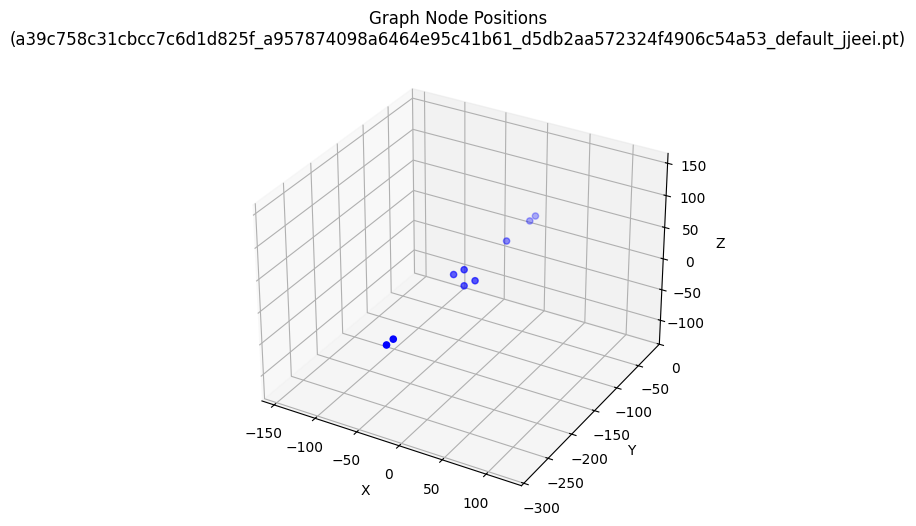

In [9]:
import os
import random
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch_geometric.data import Data

# --- CONFIGURATION ---
GRAPH_DIR = "graphs/parts"
# ---------------------

def inspect_random_graph(base_dir):
    # 1. Find a random file
    subfolders = sorted([f for f in os.listdir(base_dir) if f.startswith("part_gr")])
    if not subfolders:
        print("❌ No graph folders found!")
        return

    chosen_folder = random.choice(subfolders)
    full_folder_path = os.path.join(base_dir, chosen_folder)
    
    files = [f for f in os.listdir(full_folder_path) if f.endswith(".pt")]
    if not files:
        print(f"❌ No .pt files in {chosen_folder}")
        return

    chosen_file = random.choice(files)
    path = os.path.join(full_folder_path, chosen_file)
    
    print(f"🔍 Inspecting: {path}")
    
    # 2. Load Data (FIXED: added weights_only=False)
    try:
        data = torch.load(path, weights_only=False)
    except Exception as e:
        print(f"❌ CORRUPT FILE: {e}")
        return

    # 3. Print Statistics
    num_nodes = data.x.shape[0]
    num_edges = data.edge_index.shape[1]
    num_features = data.x.shape[1]
    
    print("-" * 30)
    print(f"✅ Status:      LOAD SUCCESS")
    print(f"Nodes (Faces): {num_nodes}")
    print(f"Edges (Links): {num_edges}")
    print(f"Features/Node: {num_features}")
    
    # 4. Validation Checks
    print("-" * 30)
    if data.x.isnan().any():
        print("❌ WARNING: Contains NaN values (Bad features)")
    else:
        print("✅ Data Check:  No NaNs found")
        
    if num_edges == 0 and num_nodes > 1:
        print("⚠️ WARNING:   Graph has no edges (Disconnected faces?)")
    else:
        print("✅ Connectivity: Graph has edges")
        
    if num_features == 14:
        print("✅ Dimensions:  Correct (14)")
    else:
        print(f"⚠️ WARNING:   Unexpected feature size: {num_features}")

    # 5. Visualize (Plot Centroids)
    # Columns 1, 2, 3 are X, Y, Z centroids
    centroids = data.x[:, 1:4].numpy()
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Plot centroids
    ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='b', marker='o', s=20)
    
    # Make axes proportional for better visualization
    # (Simple trick to keep 3D aspect ratio somewhat correct)
    x_range = centroids[:,0].max() - centroids[:,0].min()
    y_range = centroids[:,1].max() - centroids[:,1].min()
    z_range = centroids[:,2].max() - centroids[:,2].min()
    max_range = max(x_range, y_range, z_range)
    
    mid_x = (centroids[:,0].max() + centroids[:,0].min()) * 0.5
    mid_y = (centroids[:,1].max() + centroids[:,1].min()) * 0.5
    mid_z = (centroids[:,2].max() + centroids[:,2].min()) * 0.5
    
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    ax.set_title(f"Graph Node Positions\n({chosen_file})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# Run the inspector
inspect_random_graph(GRAPH_DIR)

### Validate linking between parts & graphs

In [ ]:
import os

# 1. Extract part IDs from mates.parquet
assembly_parts = set()
for parts in mates_df["parts"]:
    # each entry is a list of part_ids
    assembly_parts.update(parts)

# 2. Load graph part IDs (chunks 0–16 only)
graph_parts = set()
for root, _, files in os.walk("graphs/parts"):
    for f in files:
        if f.endswith(".pt"):
            graph_parts.add(f.replace(".pt", ""))

# 3. Compare
covered = assembly_parts & graph_parts
missing = assembly_parts - graph_parts

print("Assembly parts total:", len(assembly_parts))
print("Graphs available:", len(graph_parts))
print("Assembly parts covered:", len(coverThe M.S. degree from IIT Madras is considered equivalent to M.E./MTech. degrees (please refer to Page-22, Part-III, Sec-4, Sl. No.-9 at https:/ed))
print("Assembly parts missing:", len(missing))


Assembly parts total: 364805
Graphs available: 169982
Assembly parts covered: 135837
Assembly parts missing: 228968


## Some analysis to build assembly graphs

### Load assembly.parquet

In [1]:
import pandas as pd

assemblies_df = pd.read_parquet("../Automate/assemblies.parquet")


### Filter assemblies using parquet ONLY

In [2]:
filtered_df = assemblies_df[
    (assemblies_df["n_parts"] >= 2) &
    (assemblies_df["n_parts"] <= 50) &
    (assemblies_df["n_step"] > 0)
]


### Build assemblyId --> json_path index

In [3]:
import os

ASSEMBLY_ROOT = "../Automate/assemblies"

assembly_json_index = {}

for root, _, files in os.walk(ASSEMBLY_ROOT):
    for f in files:
        if f.endswith(".json"):
            aid = f.replace(".json", "")
            assembly_json_index[aid] = os.path.join(root, f)


### assemblies that actually have JSON files

In [4]:
filtered_df = filtered_df[
    filtered_df["assemblyId"].isin(assembly_json_index)
]


### parsing  JSONs

In [5]:
import json

aid = filtered_df.iloc[0]["assemblyId"]
json_path = assembly_json_index[aid]

with open(json_path) as f:
    assembly = json.load(f)


### Extract unique parts

In [6]:
def extract_unique_parts(assembly):
    parts = assembly["parts"]
    unique = {}
    for p in parts:
        unique[p["id"]] = p
    return list(unique.keys())


### Map occurrence index --> part ID

In [7]:
def build_occurrence_map(assembly):
    parts = assembly["parts"]
    occ_map = {}

    for i, occ in enumerate(assembly["occurrences"]):
        part_idx = occ["part"]
        part_id = parts[part_idx]["id"]
        occ_map[i] = part_id

    return occ_map


### Normalize mates into part–part edges

In [8]:
def extract_part_mates(assembly, occ_map):
    edges = []

    for m in assembly["mates"]:
        o1, o2 = m["occurrences"]
        p1 = occ_map[o1]
        p2 = occ_map[o2]

        edges.append({
            "p1": p1,
            "p2": p2,
            "mateType": m["mateType"]
        })

    return edges


### Validate part graph availability

In [9]:
def has_all_part_graphs(part_ids, graph_parts):
    return all(p in graph_parts for p in part_ids)


### filter assemblies by existing part graphs

In [1]:
import json
import os
from pathlib import Path
from collections import defaultdict, Counter

# -----------------------------
# CONFIG (edit these 2 paths)
# -----------------------------
ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")
PART_GRAPHS_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/graphs/parts")

OUT_DIR = Path("./assembly_filter_out")
OUT_DIR.mkdir(parents=True, exist_ok=True)

USABLE_PATH = OUT_DIR / "usable_assemblies.jsonl"
REJECTED_PATH = OUT_DIR / "rejected_assemblies.jsonl"
MISSING_PARTS_PATH = OUT_DIR / "missing_part_ids.txt"


# -----------------------------
# Helpers
# -----------------------------
def iter_part_graph_ids(part_graphs_root: Path) -> set[str]:
    """
    Build a set of available part IDs from all shard folders part_gr_*.
    Assumes each part graph is stored as a file whose stem == part_id.
    (e.g., <part_id>.json)
    """
    available = set()
    shard_dirs = sorted([p for p in part_graphs_root.iterdir() if p.is_dir() and p.name.startswith("part_gr_")])

    for d in shard_dirs:
        # Most likely graphs are JSON; keep it flexible (json, pkl, etc.)
        for fp in d.iterdir():
            if fp.is_file():
                # If you have only JSON graphs, replace with: if fp.suffix == ".json":
                available.add(fp.stem)

    return available


def extract_part_ids(assembly_obj: dict) -> set[str]:
    """
    Try a few common patterns to get part IDs.
    Primary expected: assembly_obj["parts"] is a list of dicts with key "id".
    """
    part_ids = set()

    parts = assembly_obj.get("parts", None)
    if isinstance(parts, list):
        for p in parts:
            if isinstance(p, dict):
                pid = p.get("id")
                if isinstance(pid, str):
                    part_ids.add(pid)

    # If your schema differs, extend here with other fallbacks:
    # e.g. "components", "instances", etc.
    # comps = assembly_obj.get("components")
    # ...

    return part_ids


def safe_load_json(path: Path):
    try:
        with path.open("r", encoding="utf-8") as f:
            return json.load(f), None
    except Exception as e:
        return None, str(e)


# -----------------------------
# Main
# -----------------------------
def main():
    print("Indexing available part graphs...")
    available_part_ids = iter_part_graph_ids(PART_GRAPHS_ROOT)
    print(f"Found part graphs: {len(available_part_ids):,}")

    asm_shards = sorted([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")])
    print(f"Found assembly shards: {len(asm_shards):,}")

    total_assemblies = 0
    usable_count = 0
    rejected_count = 0

    missing_hist = Counter()
    bad_json_count = 0
    no_parts_count = 0

    all_missing_parts = set()

    with USABLE_PATH.open("w", encoding="utf-8") as f_ok, REJECTED_PATH.open("w", encoding="utf-8") as f_bad:
        for shard in asm_shards:
            # assumes each shard has many *.json files
            json_files = list(shard.glob("*.json"))
            if not json_files:
                continue

            for asm_json in json_files:
                total_assemblies += 1

                obj, err = safe_load_json(asm_json)
                if err is not None:
                    bad_json_count += 1
                    rejected_count += 1
                    rec = {
                        "assembly_path": str(asm_json),
                        "status": "BROKEN_JSON",
                        "error": err,
                    }
                    f_bad.write(json.dumps(rec) + "\n")
                    continue

                part_ids = extract_part_ids(obj)
                if not part_ids:
                    no_parts_count += 1
                    rejected_count += 1
                    rec = {
                        "assembly_path": str(asm_json),
                        "status": "NO_PARTS_FOUND",
                        "keys": sorted(list(obj.keys()))[:50],
                    }
                    f_bad.write(json.dumps(rec) + "\n")
                    continue

                missing = sorted([pid for pid in part_ids if pid not in available_part_ids])

                if not missing:
                    usable_count += 1
                    rec = {
                        "assembly_path": str(asm_json),
                        "status": "USABLE",
                        "num_parts": len(part_ids),
                    }
                    f_ok.write(json.dumps(rec) + "\n")
                else:
                    rejected_count += 1
                    missing_hist[len(missing)] += 1
                    all_missing_parts.update(missing)

                    rec = {
                        "assembly_path": str(asm_json),
                        "status": "MISSING_PART_GRAPHS",
                        "num_parts": len(part_ids),
                        "num_missing": len(missing),
                        "missing_parts": missing[:200],  # cap to keep lines sane; full list is in missing_part_ids.txt
                    }
                    f_bad.write(json.dumps(rec) + "\n")

                # lightweight progress every 50k assemblies
                if total_assemblies % 50000 == 0:
                    print(f"Scanned {total_assemblies:,} | usable {usable_count:,} | rejected {rejected_count:,}")

    # write dedup missing parts
    with MISSING_PARTS_PATH.open("w", encoding="utf-8") as f:
        for pid in sorted(all_missing_parts):
            f.write(pid + "\n")

    print("\n=== SUMMARY ===")
    print(f"Total assemblies scanned: {total_assemblies:,}")
    print(f"Usable assemblies:        {usable_count:,}")
    print(f"Rejected assemblies:      {rejected_count:,}")
    if total_assemblies:
        print(f"Usable %:                 {usable_count * 100.0 / total_assemblies:.2f}%")

    print(f"Broken JSON:              {bad_json_count:,}")
    print(f"No parts found:           {no_parts_count:,}")
    print(f"Unique missing part IDs:  {len(all_missing_parts):,}")

    if missing_hist:
        print("\nMissing-parts histogram (num_missing -> count):")
        for k in sorted(missing_hist.keys())[:30]:
            print(f"  {k:>3} -> {missing_hist[k]:,}")
        if len(missing_hist) > 30:
            print("  ... (truncated)")

    print("\nOutputs written to:")
    print(f"  {USABLE_PATH}")
    print(f"  {REJECTED_PATH}")
    print(f"  {MISSING_PARTS_PATH}")


if __name__ == "__main__":
    main()


Indexing available part graphs...
Found part graphs: 169,982
Found assembly shards: 26
Scanned 50,000 | usable 2,127 | rejected 47,873
Scanned 100,000 | usable 4,251 | rejected 95,749
Scanned 150,000 | usable 6,427 | rejected 143,573
Scanned 200,000 | usable 8,521 | rejected 191,479
Scanned 250,000 | usable 10,694 | rejected 239,306

=== SUMMARY ===
Total assemblies scanned: 255,211
Usable assemblies:        10,920
Rejected assemblies:      244,291
Usable %:                 4.28%
Broken JSON:              0
No parts found:           5,652
Unique missing part IDs:  1,375,134

Missing-parts histogram (num_missing -> count):
    1 -> 38,175
    2 -> 43,767
    3 -> 29,528
    4 -> 21,766
    5 -> 14,791
    6 -> 11,767
    7 -> 11,838
    8 -> 7,986
    9 -> 5,546
   10 -> 4,418
   11 -> 3,194
   12 -> 3,305
   13 -> 3,085
   14 -> 2,701
   15 -> 2,692
   16 -> 1,727
   17 -> 3,068
   18 -> 1,239
   19 -> 1,829
   20 -> 1,246
   21 -> 1,910
   22 -> 837
   23 -> 847
   24 -> 980
   25 -> 

### Diagnose the ID mismatch


In [1]:
import random
from pathlib import Path

PART_GRAPHS_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/graphs/parts")
MISSING_PATH = Path("assembly_filter_out/missing_part_ids.txt")

# load available part ids
available = set()
for d in PART_GRAPHS_ROOT.iterdir():
    if d.is_dir() and d.name.startswith("part_gr_"):
        for fp in d.iterdir():
            if fp.is_file():
                available.add(fp.stem)

print("available:", len(available))

# sample missing ids
missing = []
with MISSING_PATH.open() as f:
    for line in f:
        missing.append(line.strip())

print("missing:", len(missing))

SAMPLE = 20000
sample = random.sample(missing, min(SAMPLE, len(missing)))

def strip_suffix(pid: str) -> str:
    # common pattern: base + "_" + variant (like _default_jndhmra)
    # keep only first 3 chunks if your base is like a_b_c (adjust if needed)
    parts = pid.split("_")
    # heuristic: many ids look like <hash>_<hash>_<hash>_<variant...>
    if len(parts) >= 4:
        return "_".join(parts[:3])
    return pid

# direct matches
direct = sum(1 for pid in sample if pid in available)

# suffix-stripped matches
stripped = sum(1 for pid in sample if strip_suffix(pid) in available)

print(f"Sample size: {len(sample)}")
print(f"Direct match rate: {direct/len(sample)*100:.2f}%")
print(f"Suffix-stripped match rate: {stripped/len(sample)*100:.2f}%")


available: 169982
missing: 1375134
Sample size: 20000
Direct match rate: 0.00%
Suffix-stripped match rate: 0.00%


### Fix the “No parts found: 5,652”

In [2]:
import json
from pathlib import Path
from collections import Counter

ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")

keys_counter = Counter()
examples = 0

for shard in sorted([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")]):
    for asm_json in shard.glob("*.json"):
        with open(asm_json) as f:
            obj = json.load(f)
        # count top-level keys
        for k in obj.keys():
            keys_counter[k] += 1
        examples += 1
        if examples >= 2000:
            break
    if examples >= 2000:
        break

print("Top keys:")
for k, v in keys_counter.most_common(30):
    print(k, v)


Top keys:
assemblyId 2000
parts 2000
occurrences 2000
mates 2000
mateRelations 2000
mateGroups 2000
subAssemblies 2000
has_all_parasolid 2000
has_all_step 2000


### Print one assembly JSON’s parts[0] and occurrences[0]

In [3]:
import json
from pathlib import Path
import random

ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")

# pick a random json from a random shard
shard = random.choice([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")])
asm_json = random.choice(list(shard.glob("*.json")))

print("Using:", asm_json)

obj = json.load(open(asm_json))

print("\nTop keys:", list(obj.keys()))
print("\nparts type:", type(obj.get("parts")), "len:", len(obj.get("parts", [])))

if obj.get("parts"):
    p0 = obj["parts"][0]
    print("\nparts[0] keys:", list(p0.keys()))
    print("parts[0] sample:", p0)

print("\noccurrences type:", type(obj.get("occurrences")), "len:", len(obj.get("occurrences", [])))
if obj.get("occurrences"):
    o0 = obj["occurrences"][0]
    print("\noccurrences[0] keys:", list(o0.keys()))
    print("occurrences[0] sample:", o0)


Using: /media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/05231fe59f9b2393bbbf8c67_8458bb085b3bf3038e1a62c9_9d6cb767736937b72c2c4fe8_default.json

Top keys: ['assemblyId', 'parts', 'occurrences', 'mates', 'mateRelations', 'mateGroups', 'subAssemblies', 'has_all_parasolid', 'has_all_step']

parts type: <class 'list'> len: 7

parts[0] keys: ['id', 'has_parasolid', 'has_step']
parts[0] sample: {'id': '58e87a875802200f741ef1f7_94eade3488ce9e843789cf9a_9a42086f469b92ee2811bbe1_default_jjvei', 'has_parasolid': True, 'has_step': True}

occurrences type: <class 'list'> len: 7

occurrences[0] keys: ['part', 'id', 'transform', 'fixed', 'hidden', 'has_parasolid', 'has_step']
occurrences[0] sample: {'part': 5, 'id': 'MtyzGgtyGhL5EnLSd', 'transform': [1.0, 0.0, 0.0, -0.004345436588689293, 0.0, 1.0, 0.0, 0.005051131653788704, 0.0, 0.0, 1.0, 0.0009486241180697609, 0.0, 0.0, 0.0, 1.0], 'fixed': True, 'hidden': False, 'has_parasolid': True, 'has_step': True}


### Show what your part graph filenames actually look like

In [4]:
from pathlib import Path
import random

PART_GRAPHS_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/graphs/parts")

all_ids = []
for d in PART_GRAPHS_ROOT.iterdir():
    if d.is_dir() and d.name.startswith("part_gr_"):
        for fp in d.iterdir():
            if fp.is_file():
                all_ids.append(fp.stem)

print("Total graph ids:", len(all_ids))
print("First 20:", all_ids[:20])
print("Random 20:", random.sample(all_ids, 20))


Total graph ids: 169982
First 20: ['8a9002acad7a1652c2f6447b_2652b4b6a170d5ddf7279e12_a865c2b234298d57ee989847_default_kjyegra', 'bcf6da385eff5c514c5e05da_58cd2115067a5f1bca00aa68_c7f6474abdf0997a7218fc23_default_kjieora', '053e39eaa76e4cada292dc10_e66c723187213b3800fa60f2_e446df5b5156e6e690e7ef9e_default_jjeei', '966b40e1c61c0a4a366ffffa_d51ded5c0a777b2dd3c97524_49a48c7f6d402178ded2e5b0_default_jjgei', '3224b5f300f06a2e3922bd28_dee7952b01a4bab1b2ebd39f_a0845806488014bf868cb776_default_jjyei', 'ce3c623bc64f6233affcbaca_9dc026d4b091461c5788e12c_509b5ff4b0ae7170b6f6b19f_default_jjrei', '81676854cbd2df0971f1f742_4e130ec73f3d88d434df4f17_0cbe6bcab828847a313b491c_default_jjeei', '8a261a70f1b1d52bca9d620c_b54f369c38ebd5a22b7ef534_0a437263338afcef233c4255_default_kjregra', '5e229682156342614dd86495_d3664f5ac1d08e94580deeb8_0b69bb37944de559edde3fd7_default_jjeei', '6eca2bd062a3fcdc0849eaba_85f14ad26da833c3bf6c4da5_84688c8cf77dfb634edc4807_default_kjiuira', '63f860edd9c6ad718ed381f0_433355177e1

### to increase usable assemblies fastest

#### Fix the “No parts found: 5,652”

In [5]:
import json
from pathlib import Path
from collections import Counter

ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")

hist = Counter()
empty_examples = []

scanned = 0
for shard in sorted([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")]):
    for asm_json in shard.glob("*.json"):
        obj = json.load(open(asm_json))
        parts = obj.get("parts", [])
        hist[len(parts) if isinstance(parts, list) else -1] += 1
        if isinstance(parts, list) and len(parts) == 0 and len(empty_examples) < 5:
            empty_examples.append(str(asm_json))
        scanned += 1
    # remove this break if you want full scan; start with 1 shard to confirm
    break

print("Parts length histogram (first shard):")
for k in sorted(hist.keys())[:25]:
    print(k, hist[k])

print("\nExample empty-parts assemblies:")
for e in empty_examples:
    print(e)


Parts length histogram (first shard):
0 210
1 203
2 1225
3 947
4 637
5 787
6 471
7 547
8 334
9 294
10 232
11 262
12 214
13 183
14 148
15 124
16 166
17 108
18 86
19 91
20 141
21 77
22 71
23 60
24 73

Example empty-parts assemblies:
/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/06fa34dee35eb37442c2c91c_55e564ab1ffc20729f250b66_0a335d67a6686f7a4c7a6639_default.json
/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/09232548208523ecf5ace21e_0b85ad9e505d30f652a29867_e543ca0d749207fbea872d6e_default.json
/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/009133f815dd58b0103ad240_9f77f4995c8bf38fc7cc1f21_aba7d399b0434558bf294722_default.json
/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/053ccecab137b7f53b370684_07b8e6ced0cac70ce9ed3079_6ba1a4f0068bd64b6d646202_default.json
/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/ass

#### Rank missing parts by frequency (most impact)

In [6]:
import json
from pathlib import Path
from collections import Counter

ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")
PART_GRAPHS_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/graphs/parts")

# load available graph ids
available = set()
for d in PART_GRAPHS_ROOT.iterdir():
    if d.is_dir() and d.name.startswith("part_gr_"):
        for fp in d.iterdir():
            if fp.is_file():
                available.add(fp.stem)

missing_freq = Counter()

total = 0
for shard in sorted([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")]):
    for asm_json in shard.glob("*.json"):
        obj = json.load(open(asm_json))
        parts = obj.get("parts", [])
        if not isinstance(parts, list) or len(parts) == 0:
            continue
        part_ids = {p.get("id") for p in parts if isinstance(p, dict) and isinstance(p.get("id"), str)}
        missing = [pid for pid in part_ids if pid not in available]
        missing_freq.update(missing)
        total += 1

    print(f"Done shard {shard.name} | scanned assemblies: {total:,} | unique missing seen: {len(missing_freq):,}")

# write top missing parts
out = Path("assembly_filter_out/top_missing_parts.txt")
with out.open("w") as f:
    for pid, c in missing_freq.most_common(50000):  # adjust
        f.write(f"{c}\t{pid}\n")

print("Wrote:", out)
print("Top 20 missing parts:")
for pid, c in missing_freq.most_common(20):
    print(c, pid)


Done shard asm_00000 | scanned assemblies: 9,790 | unique missing seen: 64,259
Done shard asm_00001 | scanned assemblies: 19,619 | unique missing seen: 122,887
Done shard asm_00002 | scanned assemblies: 29,347 | unique missing seen: 182,121
Done shard asm_00003 | scanned assemblies: 39,178 | unique missing seen: 241,749
Done shard asm_00004 | scanned assemblies: 48,978 | unique missing seen: 300,679
Done shard asm_00005 | scanned assemblies: 58,739 | unique missing seen: 360,271
Done shard asm_00006 | scanned assemblies: 68,535 | unique missing seen: 410,515
Done shard asm_00007 | scanned assemblies: 78,309 | unique missing seen: 469,560
Done shard asm_00008 | scanned assemblies: 88,017 | unique missing seen: 510,591
Done shard asm_00009 | scanned assemblies: 97,708 | unique missing seen: 545,081
Done shard asm_00010 | scanned assemblies: 107,515 | unique missing seen: 592,535
Done shard asm_00011 | scanned assemblies: 117,303 | unique missing seen: 644,959
Done shard asm_00012 | scann

In [1]:
import json
from pathlib import Path
import numpy as np
from collections import defaultdict

ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")
USABLE_FILE = Path("assembly_filter_out/usable_assemblies.jsonl")

# -----------------------------
# Load usable assembly paths
# -----------------------------
usable_paths = set()
with USABLE_FILE.open() as f:
    for line in f:
        obj = json.loads(line)
        usable_paths.add(obj["assembly_path"])

print("Usable assemblies loaded:", len(usable_paths))


# -----------------------------
# Stats containers
# -----------------------------
def make_stats():
    return defaultdict(list)

stats_all = make_stats()
stats_usable = make_stats()


# -----------------------------
# Assembly scan
# -----------------------------
def safe_len(obj, key):
    v = obj.get(key)
    if isinstance(v, list):
        return len(v)
    return 0


total = 0
for shard in sorted([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")]):
    for asm_json in shard.glob("*.json"):
        with open(asm_json) as f:
            obj = json.load(f)

        rec = {
            "parts": safe_len(obj, "parts"),
            "occurrences": safe_len(obj, "occurrences"),
            "mates": safe_len(obj, "mates"),
            "mateRelations": safe_len(obj, "mateRelations"),
            "mateGroups": safe_len(obj, "mateGroups"),
            "subAssemblies": safe_len(obj, "subAssemblies"),
        }

        for k, v in rec.items():
            stats_all[k].append(v)

        if str(asm_json) in usable_paths:
            for k, v in rec.items():
                stats_usable[k].append(v)

        total += 1
        if total % 50000 == 0:
            print("Scanned:", total)

print("Total scanned:", total)


# -----------------------------
# Summary helper
# -----------------------------
def summarize(arr):
    arr = np.array(arr)
    return {
        "mean": float(arr.mean()),
        "median": float(np.median(arr)),
        "min": int(arr.min()),
        "max": int(arr.max()),
    }


# -----------------------------
# Print summaries
# -----------------------------
print("\n=== ALL ASSEMBLIES ===")
for k in stats_all:
    s = summarize(stats_all[k])
    print(f"{k:15s} | mean {s['mean']:.2f} | median {s['median']:.0f} | min {s['min']} | max {s['max']}")

print("\n=== USABLE ASSEMBLIES ONLY ===")
for k in stats_usable:
    s = summarize(stats_usable[k])
    print(f"{k:15s} | mean {s['mean']:.2f} | median {s['median']:.0f} | min {s['min']} | max {s['max']}")


Usable assemblies loaded: 10920
Scanned: 50000
Scanned: 100000
Scanned: 150000
Scanned: 200000
Scanned: 250000
Total scanned: 255211

=== ALL ASSEMBLIES ===
parts           | mean 34.93 | median 7 | min 0 | max 46647
occurrences     | mean 34.93 | median 7 | min 0 | max 46647
mates           | mean 15.17 | median 3 | min 0 | max 13183
mateRelations   | mean 0.07 | median 0 | min 0 | max 91
mateGroups      | mean 0.61 | median 0 | min 0 | max 3259
subAssemblies   | mean 2.40 | median 0 | min 0 | max 1014

=== USABLE ASSEMBLIES ONLY ===
parts           | mean 5.38 | median 2 | min 1 | max 5250
occurrences     | mean 5.38 | median 2 | min 1 | max 5250
mates           | mean 4.02 | median 1 | min 0 | max 5000
mateRelations   | mean 0.02 | median 0 | min 0 | max 5
mateGroups      | mean 0.02 | median 0 | min 0 | max 5
subAssemblies   | mean 0.35 | median 0 | min 0 | max 257


In [3]:
import json
from pathlib import Path

asm = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000")
sample = next(asm.glob("*.json"))

obj = json.load(open(sample))

print("mates count:", len(obj.get("mates", [])))
print("mateRelations count:", len(obj.get("mateRelations", [])))
print("mateGroups count:", len(obj.get("mateGroups", [])))

print("\nSample mate:")
print(obj["mates"][0] if obj.get("mates") else "None")

print("\nSample mateRelation:")
print(obj["mateRelations"][0] if obj.get("mateRelations") else "None")

print("\nSample mateGroup:")
print(obj["mateGroups"][0] if obj.get("mateGroups") else "None")



mates count: 0
mateRelations count: 0
mateGroups count: 1

Sample mate:
None

Sample mateRelation:
None

Sample mateGroup:
{'name': 'Group 1', 'id': 'MnxJ7bY9jmlHwyfSi', 'occurrences': [82, 46, 77, 66, 43, 34, 76, 11, 78, 68, 81, 13, 64, 48, 5, 87, 65, 70, 0, 42, 80, 24, 45, 69, 35, 50, 36, 84, 18, 47, 7, 26, 92, 9, 74, 44, 10, 6, 41, 59, 16, 2, 17, 8, 28, 91, 71, 19, 62, 1, 53, 63, 57, 86, 29, 37, 58, 12, 83, 88, 67, 40, 14, 23, 90, 54, 89, 30, 49, 25, 39, 4, 72, 79, 31, 15, 3, 38, 32, 56, 21, 75, 22, 27, 73, 20, 52, 60, 85, 51, 33, 55, 61], 'has_parasolid': False, 'has_step': False}


In [5]:
from collections import Counter

assembly_type = Counter()

def safe_len(obj, key):
    v = obj.get(key)
    return len(v) if isinstance(v, list) else 0

for shard in sorted([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")]):
    for asm_json in shard.glob("*.json"):
        obj = json.load(open(asm_json))

        m = safe_len(obj, "mates")
        g = safe_len(obj, "mateGroups")

        if m > 0:
            assembly_type["Constrained"] += 1
        elif g > 0:
            assembly_type["Group-only"] += 1
        else:
            assembly_type["No-constraints"] += 1

print(assembly_type)


Counter({'Constrained': 186482, 'No-constraints': 59134, 'Group-only': 9595})


### the assembly with the most parts

In [6]:
import json
from pathlib import Path

ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")

max_parts = -1
max_assembly_path = None

def safe_len(obj, key):
    v = obj.get(key)
    return len(v) if isinstance(v, list) else 0

for shard in sorted([p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")]):
    for asm_json in shard.glob("*.json"):
        with open(asm_json) as f:
            obj = json.load(f)

        n_parts = safe_len(obj, "parts")

        if n_parts > max_parts:
            max_parts = n_parts
            max_assembly_path = asm_json

print("Assembly with maximum parts:")
print("Path :", max_assembly_path)
print("Parts:", max_parts)
print("Assembly ID:", max_assembly_path.stem if max_assembly_path else None)


Assembly with maximum parts:
Path : /media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00018/b1962d9eb0863de9d3befdfb_0e59c1f11f56bbf035659f09_a60cbcfa67d608b28ffb10fa_default.json
Parts: 46647
Assembly ID: b1962d9eb0863de9d3befdfb_0e59c1f11f56bbf035659f09_a60cbcfa67d608b28ffb10fa_default


### Assembly statistics analysis

In [1]:
# ============================
# Assembly statistics analysis
# ============================

import json
from pathlib import Path
from collections import defaultdict
import numpy as np

# ----------------------------
# PATHS (adjust if needed)
# ----------------------------
ASSEMBLIES_ROOT = Path("/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies")
USABLE_FILE = Path("assembly_filter_out/usable_assemblies.jsonl")
OUT_FILE = Path("assembly_filter_out/assembly_stats_v1.json")

OUT_FILE.parent.mkdir(parents=True, exist_ok=True)

# ----------------------------
# Load usable assembly paths
# ----------------------------
usable_paths = set()
with USABLE_FILE.open() as f:
    for line in f:
        obj = json.loads(line)
        usable_paths.add(obj["assembly_path"])

print("Usable assemblies loaded:", len(usable_paths))

# ----------------------------
# Helpers
# ----------------------------
def safe_len(obj, key):
    v = obj.get(key)
    return len(v) if isinstance(v, list) else 0

def make_stats():
    return defaultdict(list)

def summarize(arr):
    arr = np.array(arr)
    return {
        "mean": float(arr.mean()),
        "median": float(np.median(arr)),
        "min": int(arr.min()),
        "max": int(arr.max()),
        "count": int(len(arr)),
    }

# ----------------------------
# Stats containers
# ----------------------------
stats_all = make_stats()
stats_usable = make_stats()

# ----------------------------
# Scan assemblies
# ----------------------------
total = 0

asm_shards = sorted(
    [p for p in ASSEMBLIES_ROOT.iterdir() if p.is_dir() and p.name.startswith("asm_")]
)

for shard in asm_shards:
    for asm_json in shard.glob("*.json"):
        with asm_json.open() as f:
            obj = json.load(f)

        rec = {
            "parts": safe_len(obj, "parts"),
            "occurrences": safe_len(obj, "occurrences"),
            "mates": safe_len(obj, "mates"),
            "mateRelations": safe_len(obj, "mateRelations"),
            "mateGroups": safe_len(obj, "mateGroups"),
            "subAssemblies": safe_len(obj, "subAssemblies"),
        }

        for k, v in rec.items():
            stats_all[k].append(v)

        if str(asm_json) in usable_paths:
            for k, v in rec.items():
                stats_usable[k].append(v)

        total += 1
        if total % 50000 == 0:
            print("Scanned:", total)

print("Total scanned:", total)

# ----------------------------
# Print summaries
# ----------------------------
print("\n=== ALL ASSEMBLIES ===")
for k in stats_all:
    s = summarize(stats_all[k])
    print(f"{k:15s} | mean {s['mean']:.2f} | median {s['median']:.0f} | min {s['min']} | max {s['max']}")

print("\n=== USABLE ASSEMBLIES ONLY ===")
for k in stats_usable:
    s = summarize(stats_usable[k])
    print(f"{k:15s} | mean {s['mean']:.2f} | median {s['median']:.0f} | min {s['min']} | max {s['max']}")

# ----------------------------
# Save JSON artifact
# ----------------------------
summary = {
    "all": {k: summarize(v) for k, v in stats_all.items()},
    "usable": {k: summarize(v) for k, v in stats_usable.items()},
}

from pprint import pprint

preview = {
    "all": {k: summarize(v) for k, v in stats_all.items()},
    "usable": {k: summarize(v) for k, v in stats_usable.items()},
}

print("=== PREVIEW OF STATS TO BE SAVED ===")
pprint(preview)


# with OUT_FILE.open("w") as f:
#     json.dump(summary, f, indent=2)

# print("\nSaved stats to:", OUT_FILE)


Usable assemblies loaded: 10920
Scanned: 50000
Scanned: 100000
Scanned: 150000
Scanned: 200000
Scanned: 250000
Total scanned: 255211

=== ALL ASSEMBLIES ===
parts           | mean 34.93 | median 7 | min 0 | max 46647
occurrences     | mean 34.93 | median 7 | min 0 | max 46647
mates           | mean 15.17 | median 3 | min 0 | max 13183
mateRelations   | mean 0.07 | median 0 | min 0 | max 91
mateGroups      | mean 0.61 | median 0 | min 0 | max 3259
subAssemblies   | mean 2.40 | median 0 | min 0 | max 1014

=== USABLE ASSEMBLIES ONLY ===
parts           | mean 5.38 | median 2 | min 1 | max 5250
occurrences     | mean 5.38 | median 2 | min 1 | max 5250
mates           | mean 4.02 | median 1 | min 0 | max 5000
mateRelations   | mean 0.02 | median 0 | min 0 | max 5
mateGroups      | mean 0.02 | median 0 | min 0 | max 5
subAssemblies   | mean 0.35 | median 0 | min 0 | max 257
=== PREVIEW OF STATS TO BE SAVED ===
{'all': {'mateGroups': {'count': 255211,
                        'max': 3259,
   

### Saving the above in json

In [2]:
# ============================
# Save assembly statistics (v1)
# ============================

import json
from pathlib import Path
import numpy as np

OUT_FILE = Path("assembly_filter_out/assembly_stats_v1.json")
OUT_FILE.parent.mkdir(parents=True, exist_ok=True)

def summarize(arr):
    arr = np.array(arr)
    return {
        "mean": float(arr.mean()),
        "median": float(np.median(arr)),
        "min": int(arr.min()),
        "max": int(arr.max()),
        "count": int(len(arr)),
    }

# Build summary exactly as previewed
stats_summary = {
    "all": {k: summarize(v) for k, v in stats_all.items()},
    "usable": {k: summarize(v) for k, v in stats_usable.items()},
}

# Optional but recommended metadata
final_summary = {
    "metadata": {
        "total_assemblies": stats_summary["all"]["parts"]["count"],
        "usable_assemblies": stats_summary["usable"]["parts"]["count"],
        "definition_of_usable": (
            "An assembly is usable if all referenced parts have precomputed part graphs"
        ),
        "notes": (
            "Statistics computed over full dataset and filtered usable subset; "
            "heavy-tailed distributions expected."
        ),
    },
    "stats": stats_summary,
}

# Save JSON artifact
with OUT_FILE.open("w") as f:
    json.dump(final_summary, f, indent=2)

print("✅ Assembly statistics saved to:", OUT_FILE)


✅ Assembly statistics saved to: assembly_filter_out/assembly_stats_v1.json


### Freeze the input set (small debug dataset)

In [3]:
# create a tiny debug subset
from pathlib import Path
import json

SRC = Path("assembly_filter_out/usable_assemblies.jsonl")
DST = Path("assembly_filter_out/usable_assemblies_debug_100.jsonl")

with SRC.open() as f_in, DST.open("w") as f_out:
    for i, line in enumerate(f_in):
        if i >= 100:
            break
        f_out.write(line)

print("Wrote debug set:", DST)


Wrote debug set: assembly_filter_out/usable_assemblies_debug_100.jsonl


### build graph for one assembly + debug parsing + batch stats

In [4]:
import json
from pathlib import Path
from collections import Counter, defaultdict

# -----------------------------
# Paths
# -----------------------------
USABLE_FILE = Path("assembly_filter_out/usable_assemblies.jsonl")
ASSEMBLY_DEBUG_N = 50  # change to 1 for single-file debugging

# -----------------------------
# Helpers
# -----------------------------
def safe_list(obj, key):
    v = obj.get(key)
    return v if isinstance(v, list) else []

def build_occurrence_to_part_map(assembly_obj):
    """
    Returns:
      occ_id_to_part_index: dict[str, int]
      occ_index_to_part_index: dict[int, int]
    Notes:
      occurrences[i] has keys: 'id' (string occurrence id) and 'part' (int index into parts list)
    """
    occurrences = safe_list(assembly_obj, "occurrences")
    occ_id_to_part_index = {}
    occ_index_to_part_index = {}
    for i, occ in enumerate(occurrences):
        if not isinstance(occ, dict):
            continue
        part_idx = occ.get("part")
        occ_id = occ.get("id")
        if isinstance(part_idx, int):
            occ_index_to_part_index[i] = part_idx
            if isinstance(occ_id, str):
                occ_id_to_part_index[occ_id] = part_idx
    return occ_id_to_part_index, occ_index_to_part_index

def extract_two_occurrences_from_mate(mate):
    """
    Tries to extract (occA, occB) from a mate dict.
    Returns:
      (a, b, mode) where a/b can be occurrence id (str) or occurrence index (int), mode is a string.
    If cannot parse, returns (None, None, "UNPARSED").
    """
    if not isinstance(mate, dict):
        return None, None, "UNPARSED"

    # Common key patterns (we try several)
    candidate_pairs = [
        ("occurrenceA", "occurrenceB"),
        ("occurrence1", "occurrence2"),
        ("occurrence0", "occurrence1"),
        ("occA", "occB"),
        ("occ1", "occ2"),
        ("a", "b"),
        ("first", "second"),
    ]
    for k1, k2 in candidate_pairs:
        if k1 in mate and k2 in mate:
            return mate[k1], mate[k2], f"PAIR_KEYS:{k1},{k2}"

    # Sometimes mates have a list called "occurrences" with 2 elements
    occs = mate.get("occurrences")
    if isinstance(occs, list) and len(occs) == 2:
        return occs[0], occs[1], "LIST_KEY:occurrences"

    # Some schemas store a list of "entities" or "instances"
    for list_key in ["entities", "instances", "connectedOccurrences", "occurrenceIds"]:
        v = mate.get(list_key)
        if isinstance(v, list) and len(v) == 2:
            return v[0], v[1], f"LIST_KEY:{list_key}"

    return None, None, "UNPARSED"

def resolve_occ_to_part_index(occ_ref, occ_id_to_part_index, occ_index_to_part_index):
    """
    occ_ref can be:
      - str: occurrence id
      - int: occurrence index (position in occurrences list)
    returns part_index or None
    """
    if isinstance(occ_ref, str):
        return occ_id_to_part_index.get(occ_ref)
    if isinstance(occ_ref, int):
        return occ_index_to_part_index.get(occ_ref)
    return None

def build_assembly_graph(assembly_obj, deduplicate_edges=True, allow_self_edges=False):
    """
    Constructs a part-level graph:
      nodes: parts (0..num_parts-1)
      edges: pairs of part indices derived from mates via occurrences

    Returns dict with:
      num_parts, num_occurrences, num_mates,
      edges (list of (u,v)),
      stats (counters about parsing)
    """
    parts = safe_list(assembly_obj, "parts")
    mates = safe_list(assembly_obj, "mates")
    occurrences = safe_list(assembly_obj, "occurrences")

    occ_id_to_part_index, occ_index_to_part_index = build_occurrence_to_part_map(assembly_obj)

    parsing_stats = Counter()
    edges = []

    for mate in mates:
        a, b, mode = extract_two_occurrences_from_mate(mate)
        parsing_stats[mode] += 1

        if a is None or b is None:
            parsing_stats["MATE_UNPARSED"] += 1
            continue

        pa = resolve_occ_to_part_index(a, occ_id_to_part_index, occ_index_to_part_index)
        pb = resolve_occ_to_part_index(b, occ_id_to_part_index, occ_index_to_part_index)

        if pa is None or pb is None:
            parsing_stats["MATE_OCC_NOT_RESOLVED"] += 1
            continue

        if (not allow_self_edges) and pa == pb:
            parsing_stats["SELF_EDGE_SKIPPED"] += 1
            continue

        edges.append((pa, pb))

    if deduplicate_edges:
        # undirected dedup (treat (u,v) same as (v,u))
        und = set()
        deduped = []
        for u, v in edges:
            key = (u, v) if u <= v else (v, u)
            if key not in und:
                und.add(key)
                deduped.append((u, v))
        edges = deduped

    # Sanity checks
    num_parts = len(parts)
    bad_edges = sum(1 for u, v in edges if not (0 <= u < num_parts and 0 <= v < num_parts))
    if bad_edges > 0:
        parsing_stats["EDGE_OUT_OF_RANGE"] += bad_edges

    return {
        "num_parts": num_parts,
        "num_occurrences": len(occurrences),
        "num_mates": len(mates),
        "num_edges": len(edges),
        "edges": edges,
        "stats": parsing_stats,
    }

# -----------------------------
# Load N usable assemblies and build graphs
# -----------------------------
usable_paths = []
with USABLE_FILE.open() as f:
    for i, line in enumerate(f):
        if i >= ASSEMBLY_DEBUG_N:
            break
        rec = json.loads(line)
        usable_paths.append(rec["assembly_path"])

print("Loaded usable assembly paths:", len(usable_paths))

batch_stats = Counter()
examples_unparsed = []

for p in usable_paths:
    obj = json.load(open(p))
    g = build_assembly_graph(obj, deduplicate_edges=True, allow_self_edges=False)

    batch_stats["assemblies"] += 1
    batch_stats["total_parts"] += g["num_parts"]
    batch_stats["total_mates"] += g["num_mates"]
    batch_stats["total_edges"] += g["num_edges"]

    # aggregate parsing stats
    for k, v in g["stats"].items():
        batch_stats[k] += v

    # keep a couple of examples if parsing fails a lot
    if g["num_mates"] > 0 and g["stats"].get("MATE_OCC_NOT_RESOLVED", 0) > 0 and len(examples_unparsed) < 3:
        examples_unparsed.append((p, g["stats"], obj.get("mates", [])[:2], obj.get("occurrences", [])[:2]))

# -----------------------------
# Print summary
# -----------------------------
n = batch_stats["assemblies"]
avg_parts = batch_stats["total_parts"] / n if n else 0
avg_mates = batch_stats["total_mates"] / n if n else 0
avg_edges = batch_stats["total_edges"] / n if n else 0

print("\n=== Assembly graph construction summary ===")
print("Assemblies processed:", n)
print(f"Avg parts: {avg_parts:.3f}")
print(f"Avg mates in JSON: {avg_mates:.3f}")
print(f"Avg edges produced: {avg_edges:.3f}")

print("\nKey parsing counters (top 15):")
for k, v in batch_stats.most_common(15):
    if k in ["assemblies", "total_parts", "total_mates", "total_edges"]:
        continue
    print(f"  {k}: {v}")

if examples_unparsed:
    print("\n=== Examples where mate occurrences were not resolved ===")
    for path, st, mates_head, occ_head in examples_unparsed:
        print("\nAssembly:", path)
        print("Stats:", dict(st))
        print("First mates:", mates_head)
        print("First occurrences:", occ_head)

print("\nDone.")


Loaded usable assembly paths: 50

=== Assembly graph construction summary ===
Assemblies processed: 50
Avg parts: 3.800
Avg mates in JSON: 2.740
Avg edges produced: 2.540

Key parsing counters (top 15):
  LIST_KEY:occurrences: 137

Done.


### explain the “missing edges” gap precisely

In [6]:
import json
from pathlib import Path
from collections import Counter

USABLE_FILE = Path("assembly_filter_out/usable_assemblies.jsonl")
ASSEMBLY_DEBUG_N = 200  # increase a bit to stabilize stats

def safe_list(obj, key):
    v = obj.get(key)
    return v if isinstance(v, list) else []

def build_occurrence_to_part_map(assembly_obj):
    occurrences = safe_list(assembly_obj, "occurrences")
    occ_id_to_part_index = {}
    occ_index_to_part_index = {}
    for i, occ in enumerate(occurrences):
        if not isinstance(occ, dict):
            continue
        part_idx = occ.get("part")
        occ_id = occ.get("id")
        if isinstance(part_idx, int):
            occ_index_to_part_index[i] = part_idx
            if isinstance(occ_id, str):
                occ_id_to_part_index[occ_id] = part_idx
    return occ_id_to_part_index, occ_index_to_part_index

def extract_two_occurrences_from_mate(mate):
    if not isinstance(mate, dict):
        return None, None, "UNPARSED"
    occs = mate.get("occurrences")
    if isinstance(occs, list) and len(occs) == 2:
        return occs[0], occs[1], "LIST_KEY:occurrences"
    return None, None, "UNPARSED"

def resolve_occ_to_part_index(occ_ref, occ_id_to_part_index, occ_index_to_part_index):
    if isinstance(occ_ref, str):
        return occ_id_to_part_index.get(occ_ref)
    if isinstance(occ_ref, int):
        return occ_index_to_part_index.get(occ_ref)
    return None

def build_edges_with_reasons(assembly_obj, deduplicate_edges=True, allow_self_edges=False):
    parts = safe_list(assembly_obj, "parts")
    mates = safe_list(assembly_obj, "mates")

    occ_id_to_part_index, occ_index_to_part_index = build_occurrence_to_part_map(assembly_obj)

    stats = Counter()
    raw_edges = []
    for mate in mates:
        a, b, mode = extract_two_occurrences_from_mate(mate)
        stats[mode] += 1
        if a is None or b is None:
            stats["MATE_UNPARSED"] += 1
            continue

        pa = resolve_occ_to_part_index(a, occ_id_to_part_index, occ_index_to_part_index)
        pb = resolve_occ_to_part_index(b, occ_id_to_part_index, occ_index_to_part_index)
        if pa is None or pb is None:
            stats["MATE_OCC_NOT_RESOLVED"] += 1
            continue

        if (not allow_self_edges) and pa == pb:
            stats["SELF_EDGE_SKIPPED"] += 1
            continue

        raw_edges.append((pa, pb))

    stats["RAW_EDGES"] = len(raw_edges)

    if deduplicate_edges:
        und = set()
        deduped = []
        for u, v in raw_edges:
            key = (u, v) if u <= v else (v, u)
            if key not in und:
                und.add(key)
                deduped.append((u, v))
            else:
                stats["DUPLICATE_EDGE_REMOVED"] += 1
        raw_edges = deduped

    stats["FINAL_EDGES"] = len(raw_edges)

    # range check
    n_parts = len(parts)
    for u, v in raw_edges:
        if not (0 <= u < n_parts and 0 <= v < n_parts):
            stats["EDGE_OUT_OF_RANGE"] += 1

    return stats

# Load N usable assembly paths
usable_paths = []
with USABLE_FILE.open() as f:
    for i, line in enumerate(f):
        if i >= ASSEMBLY_DEBUG_N:
            break
        usable_paths.append(json.loads(line)["assembly_path"])

batch = Counter()
for p in usable_paths:
    obj = json.load(open(p))
    batch.update(build_edges_with_reasons(obj, deduplicate_edges=True, allow_self_edges=False))

print("Assemblies processed:", len(usable_paths))
print("\n=== Edge drop reasons (aggregated) ===")
for k in ["MATE_UNPARSED", "MATE_OCC_NOT_RESOLVED", "SELF_EDGE_SKIPPED", "DUPLICATE_EDGE_REMOVED", "EDGE_OUT_OF_RANGE"]:
    print(f"{k:22s}: {batch.get(k,0)}")

print("\nCounts:")
print("Mates parsed:", batch.get("LIST_KEY:occurrences", 0))
print("RAW_EDGES   :", batch.get("RAW_EDGES", 0))
print("FINAL_EDGES :", batch.get("FINAL_EDGES", 0))


Assemblies processed: 200

=== Edge drop reasons (aggregated) ===
MATE_UNPARSED         : 0
MATE_OCC_NOT_RESOLVED : 0
SELF_EDGE_SKIPPED     : 0
DUPLICATE_EDGE_REMOVED: 37
EDGE_OUT_OF_RANGE     : 0

Counts:
Mates parsed: 443
RAW_EDGES   : 443
FINAL_EDGES : 406


### Visualize the graph

Assembly path: /media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default.json
Num parts: 15
Num mates: 14
Num edges: 0


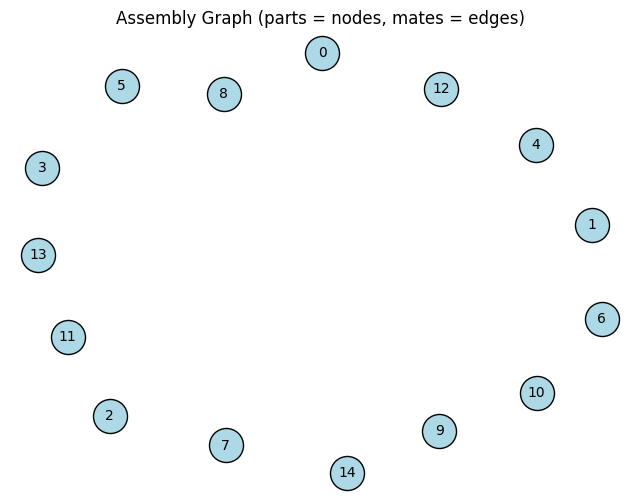

In [8]:
# ============================
# Build + visualize ONE assembly graph (self-contained)
# ============================

import json
from pathlib import Path
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# ----------------------------
# Paths
# ----------------------------
USABLE_FILE = Path("assembly_filter_out/usable_assemblies.jsonl")

# Pick which usable assembly to visualize
ASSEMBLY_IDX = 0   # change this to visualize a different one

# ----------------------------
# Helpers
# ----------------------------
def safe_list(obj, key):
    v = obj.get(key)
    return v if isinstance(v, list) else []

def build_occ_id_to_part_index(assembly_obj):
    occ_id_to_part_index = {}
    for occ in safe_list(assembly_obj, "occurrences"):
        if isinstance(occ, dict):
            occ_id = occ.get("id")
            part_idx = occ.get("part")
            if isinstance(occ_id, str) and isinstance(part_idx, int):
                occ_id_to_part_index[occ_id] = part_idx
    return occ_id_to_part_index

def build_assembly_graph_with_multiplicity(assembly_obj):
    parts = safe_list(assembly_obj, "parts")
    mates = safe_list(assembly_obj, "mates")
    occ_id_to_part_index = build_occ_id_to_part_index(assembly_obj)

    pair_counts = Counter()

    for mate in mates:
        if not isinstance(mate, dict):
            continue
        occs = mate.get("occurrences")
        if not (isinstance(occs, list) and len(occs) == 2):
            continue

        a, b = occs
        if not (isinstance(a, str) and isinstance(b, str)):
            continue

        pa = occ_id_to_part_index.get(a)
        pb = occ_id_to_part_index.get(b)
        if pa is None or pb is None:
            continue

        u, v = (pa, pb) if pa <= pb else (pb, pa)
        pair_counts[(u, v)] += 1

    edges = list(pair_counts.keys())
    multiplicity = [pair_counts[e] for e in edges]

    return {
        "num_parts": len(parts),
        "num_mates": len(mates),
        "edge_index": edges,
        "edge_multiplicity": multiplicity,
    }

# ----------------------------
# Load one usable assembly
# ----------------------------
with USABLE_FILE.open() as f:
    for i, line in enumerate(f):
        if i == ASSEMBLY_IDX:
            assembly_path = json.loads(line)["assembly_path"]
            break

print("Assembly path:", assembly_path)

assembly_obj = json.load(open(assembly_path))
graph = build_assembly_graph_with_multiplicity(assembly_obj)

print("Num parts:", graph["num_parts"])
print("Num mates:", graph["num_mates"])
print("Num edges:", len(graph["edge_index"]))

# ----------------------------
# Visualization
# ----------------------------
G = nx.Graph()

# nodes = parts
for i in range(graph["num_parts"]):
    G.add_node(i)

# edges = mates (collapsed), weighted by multiplicity
for (u, v), m in zip(graph["edge_index"], graph["edge_multiplicity"]):
    G.add_edge(u, v, weight=m)

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(
    G, pos,
    node_size=600,
    node_color="lightblue",
    edgecolors="black"
)

edge_widths = [1 + G[u][v]["weight"] for u, v in G.edges()]
nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    alpha=0.8
)

nx.draw_networkx_labels(
    G, pos,
    labels={i: str(i) for i in G.nodes()},
    font_size=10
)

edge_labels = {(u, v): G[u][v]["weight"] for u, v in G.edges()}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=9
)

plt.title("Assembly Graph (parts = nodes, mates = edges)")
plt.axis("off")
plt.show()


In [9]:
print("Num mates in JSON:", graph["num_mates"])
print("Num edges built  :", len(graph["edge_index"]))
print("First 5 edges    :", graph["edge_index"][:5])


Num mates in JSON: 14
Num edges built  : 0
First 5 edges    : []


### why no mates?
### print ONE mate object to see the schema

In [10]:
import json

path = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default.json"
obj = json.load(open(path))

print("occurrences[0] sample:")
print(obj["occurrences"][0])

print("\nmate[0] sample:")
print(obj["mates"][0])

print("\nmate[0]['occurrences'] value:")
print(obj["mates"][0].get("occurrences"))


occurrences[0] sample:
{'part': 3, 'id': 'MafvEUjFYqU3/WJ/s', 'transform': [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'fixed': True, 'hidden': False, 'has_parasolid': True, 'has_step': True}

mate[0] sample:
{'name': 'Ball 1', 'id': 'MdwoO0Iwn1On1P4JJ', 'mateType': 'BALL', 'occurrences': [13, 0], 'mcfs': [[1.0, 0.0, 0.0, -0.0997353212429435, 0.0, 1.0, 0.0, 0.000852140403117335, 0.0, 0.0, 1.0, 0.885453402231798, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, -0.0997353212429439, 0.0, 1.0, 0.0, 0.000852140403117338, 0.0, 0.0, 1.0, 0.8854534022318, 0.0, 0.0, 0.0, 1.0]], 'has_parasolid': True, 'has_step': True}

mate[0]['occurrences'] value:
[13, 0]


### Full notebook cell: build and visualize the edges correctly

Assembly path: /media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default.json
Num parts: 15
Num occurrences: 15
Num mates: 14
Num edges: 14
Debug: {'edge_added': 14}
First 10 edges: [(3, 11), (0, 13), (5, 8), (5, 10), (2, 7), (3, 4), (4, 10), (1, 12), (4, 9), (3, 14)]
First 10 multiplicity: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


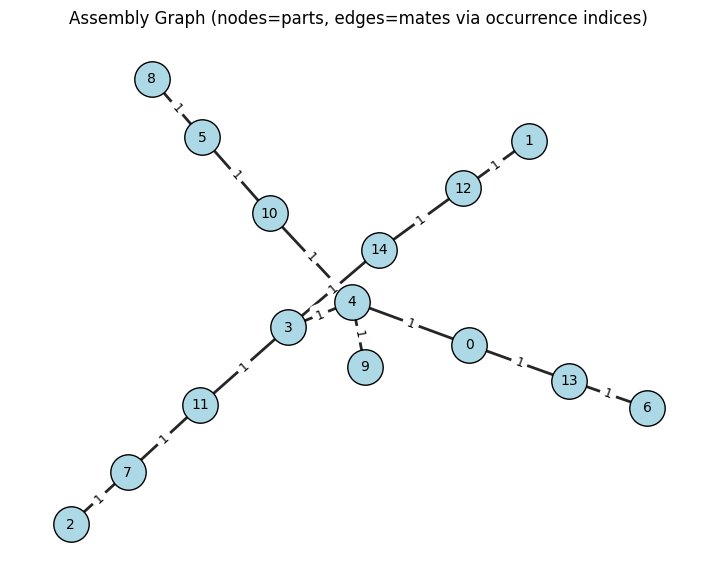

In [11]:
import json
from pathlib import Path
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# ---- Your assembly path ----
path = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default.json"

obj = json.load(open(path))

def safe_list(obj, key):
    v = obj.get(key)
    return v if isinstance(v, list) else []

def build_assembly_graph_occindex(assembly_obj, deduplicate=True, allow_self_edges=False):
    parts = safe_list(assembly_obj, "parts")
    occs = safe_list(assembly_obj, "occurrences")
    mates = safe_list(assembly_obj, "mates")

    # occurrence index -> part index
    occ_index_to_part = {}
    for i, occ in enumerate(occs):
        if isinstance(occ, dict) and isinstance(occ.get("part"), int):
            occ_index_to_part[i] = occ["part"]

    pair_counts = Counter()
    debug = Counter()

    for mate in mates:
        if not isinstance(mate, dict):
            debug["mate_not_dict"] += 1
            continue

        occ_pair = mate.get("occurrences")
        if not (isinstance(occ_pair, list) and len(occ_pair) == 2):
            debug["mate_occurrences_missing_or_not2"] += 1
            continue

        a, b = occ_pair
        if not (isinstance(a, int) and isinstance(b, int)):
            debug["mate_occurrences_not_int_pair"] += 1
            continue

        pa = occ_index_to_part.get(a)
        pb = occ_index_to_part.get(b)
        if pa is None or pb is None:
            debug["occ_index_not_resolved"] += 1
            continue

        if (not allow_self_edges) and pa == pb:
            debug["self_edge_skipped"] += 1
            continue

        u, v = (pa, pb) if pa <= pb else (pb, pa)
        pair_counts[(u, v)] += 1
        debug["edge_added"] += 1

    edges = list(pair_counts.keys())
    mult = [pair_counts[e] for e in edges]

    return {
        "num_parts": len(parts),
        "num_occurrences": len(occs),
        "num_mates": len(mates),
        "num_edges": len(edges),
        "edge_index": edges,
        "edge_multiplicity": mult,
        "debug": debug
    }

g = build_assembly_graph_occindex(obj, deduplicate=True, allow_self_edges=False)

print("Assembly path:", path)
print("Num parts:", g["num_parts"])
print("Num occurrences:", g["num_occurrences"])
print("Num mates:", g["num_mates"])
print("Num edges:", g["num_edges"])
print("Debug:", dict(g["debug"]))
print("First 10 edges:", g["edge_index"][:10])
print("First 10 multiplicity:", g["edge_multiplicity"][:10])

# --------- Visualize ----------
G = nx.Graph()
for i in range(g["num_parts"]):
    G.add_node(i)

for (u, v), m in zip(g["edge_index"], g["edge_multiplicity"]):
    G.add_edge(u, v, weight=m)

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(G, pos, node_size=650, node_color="lightblue", edgecolors="black")
nx.draw_networkx_edges(G, pos, width=[1 + G[u][v]["weight"] for u, v in G.edges()], alpha=0.85)
nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in G.nodes()}, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]["weight"] for u, v in G.edges()}, font_size=9)

plt.title("Assembly Graph (nodes=parts, edges=mates via occurrence indices)")
plt.axis("off")
plt.show()
